<a href="https://colab.research.google.com/github/gabriel-afd/Analise_Historica_Indicadores_Brasil/blob/main/An%C3%A1lise_Hist%C3%B3rica_Indicadores_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs para Modelagem e Matrizes
import numpy as np
import requests
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Libs para utilizar o Plotly
import plotly.express as px
import plotly.graph_objects as Dash

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
#Função para fazer requisições à API Worldbank
def get_world_api_infodata(country, indicatorCode):
  url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicatorCode}?format=json"
  response = requests.get(url)
  data = response.json()

  #Extraindo dados de valor e data
  if len(data) > 1 and isinstance(data[1], list):
        return [(item['date'], item['value']) for item in data[1] if item['value'] is not None]
  else:
    return []


#Indicadores para o Brasil(código - BRA)

#Criando dicionário 'indicators'
indicators = {
    "PIB per Capita": "NY.GDP.PCAP.CD",
    "Crescimento Econômico" : "NY.GDP.MKTP.KD.ZG",
    "População" : "SP.POP.TOTL",
    "Pobreza" : "SI.POV.DDAY",
    "Alfabetização" : "SE.ADT.LITR.ZS",
    "Expectativa de Vida" : "SP.DYN.LE00.IN",
    "Número de Gini" : "SI.POV.GINI",
    "Taxa de Desemprego" : "SL.UEM.TOTL.ZS",
    "População Masculina": "SP.POP.TOTL.MA.IN",
    "População Feminina" : "SP.POP.TOTL.FE.IN",
    "Taxa de Alfabetização Masculina": "SE.ADT.LITR.MA.ZS",
    "Taxa de Alfabetização Feminina": "SE.ADT.LITR.FE.ZS",
    "Baixa Renda": "SI.POV.DDAY",
    "Renda Média Baixa": "NY.GDP.PCAP.CD",
    "Renda Média Alta": "NY.GDP.PCAP.MK.DT",
    "Alta Renda": "NY.GDP.PCAP.PP.CD",
    "IDH": "SP.DYN.LE00.IN"
}


#Buscando dados para cada indicador e armazenando em um DataFrame
dataInfo = {}

for indicatorName, indicatorCode in indicators.items():
  dataInfo[indicatorName] = get_world_api_infodata("BRA", indicatorCode)


# Obter todos os anos disponiveis até 2022
allYears = set()
for indicatorData in dataInfo.values():
  allYears.update([str(entry[0]) for entry in indicatorData])

#Filtrar até 2022
allYears = sorted([year for year in allYears if int(year) <= 2022], reverse=False) #Do mais antigo ao mais recente

#Criar DataFrame preenchido com NaN
finalData = {indicator: [None] * len(allYears) for indicator in indicators}

# Preencher o DataFrame com os valores obtidos
for indicatorName, indicatorData in dataInfo.items():
    for year, value in indicatorData:
        year = str(year)  # Garantir que o ano seja uma string
        if year in allYears:
            index = allYears.index(year)  # Obter o índice do ano
            finalData[indicatorName][index] = value

Para código dos indicadores, consultar: [Indicadores](https://data.worldbank.org/indicator)

In [3]:
#Criando o DataFrame
baseData = pd.DataFrame(finalData, index = allYears)

baseData.head()


,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH
1974,1044.769809,8.153939,105089675,NaN,NaN,58.881,NaN,NaN,52448501,52641174,NaN,NaN,NaN,1044.769809,None,NaN,58.881
1975,1200.558237,5.166649,107619565,NaN,NaN,59.353,NaN,NaN,53701639,53917926,NaN,NaN,NaN,1200.558237,None,NaN,59.353
1976,1389.749523,10.257130,110213349,NaN,NaN,59.792,NaN,NaN,54988043,55225306,NaN,NaN,NaN,1389.749523,None,NaN,59.792
1977,1562.291430,4.934328,112875292,NaN,NaN,60.240,NaN,NaN,56309647,56565645,NaN,NaN,NaN,1562.291430,None,NaN,60.240
1978,1732.500122,4.969898,115600942,NaN,NaN,60.720,NaN,NaN,57663892,57937050,NaN,NaN,NaN,1732.500122,None,NaN,60.720


In [4]:
#Renomeando coluna para Ano e adicionando index no DataFrame

baseData = baseData.reset_index()
baseData.rename(columns={
    'index':'Ano'
}, inplace=True)
baseData.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH
0,1974,1044.769809,8.153939,105089675,NaN,NaN,58.881,NaN,NaN,52448501,52641174,NaN,NaN,NaN,1044.769809,None,NaN,58.881
1,1975,1200.558237,5.166649,107619565,NaN,NaN,59.353,NaN,NaN,53701639,53917926,NaN,NaN,NaN,1200.558237,None,NaN,59.353
2,1976,1389.749523,10.257130,110213349,NaN,NaN,59.792,NaN,NaN,54988043,55225306,NaN,NaN,NaN,1389.749523,None,NaN,59.792
3,1977,1562.291430,4.934328,112875292,NaN,NaN,60.240,NaN,NaN,56309647,56565645,NaN,NaN,NaN,1562.291430,None,NaN,60.240
4,1978,1732.500122,4.969898,115600942,NaN,NaN,60.720,NaN,NaN,57663892,57937050,NaN,NaN,NaN,1732.500122,None,NaN,60.720


In [5]:
#Dimensão

baseData.shape

(49, 18)

In [6]:
#Verificando campos nulos
baseData.isnull().sum()

,0
Ano,0
PIB per Capita,0
Crescimento Econômico,0
População,0
Pobreza,11
Alfabetização,32
Expectativa de Vida,0
Número de Gini,11
Taxa de Desemprego,17
População Masculina,0


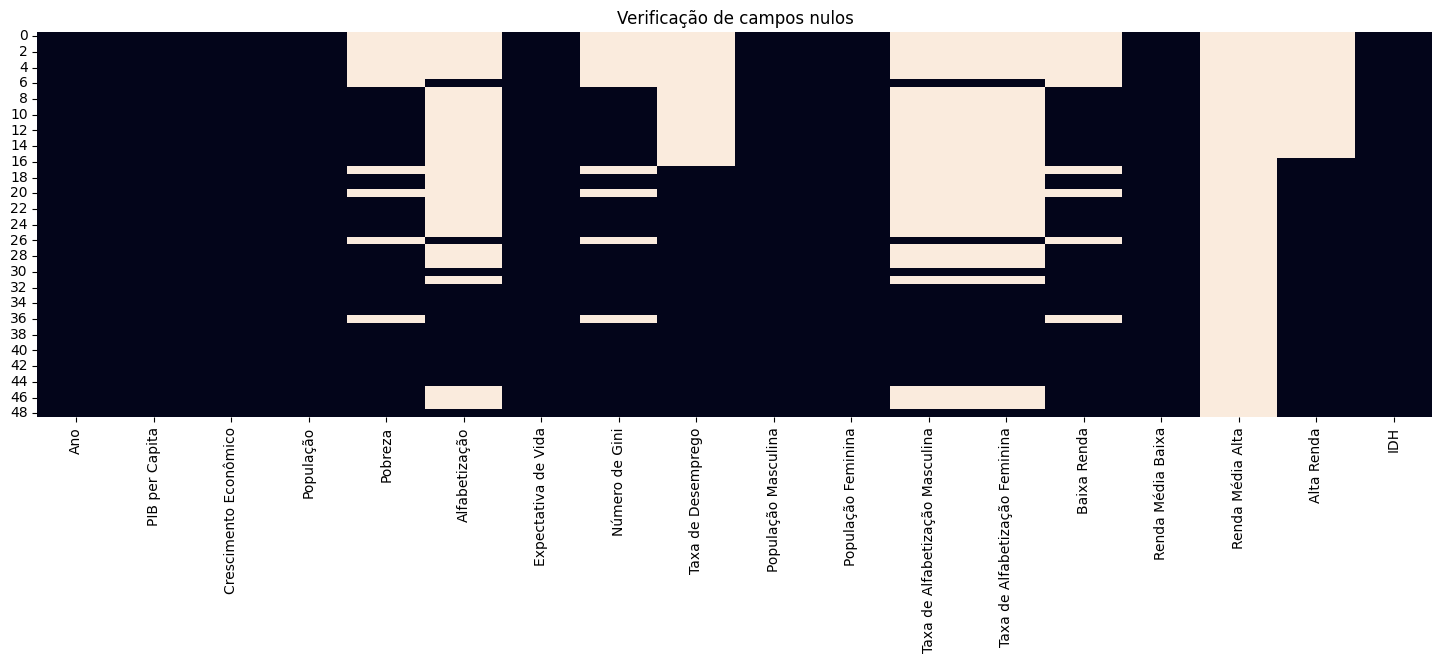

In [7]:
#Verificando campos nulos
plt.figure(figsize=(18,5))
plt.title('Verificação de campos nulos')
sns.heatmap(baseData.isnull(),cbar=False);

In [8]:
#Criando um segundo DataFrame
baseData2 = baseData[['Ano','PIB per Capita','Crescimento Econômico','População','Expectativa de Vida', 'População Masculina','População Feminina','Baixa Renda', 'Renda Média Baixa', 'Renda Média Alta','Alta Renda','IDH']]
baseData2.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Expectativa de Vida,População Masculina,População Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH
0,1974,1044.769809,8.153939,105089675,58.881,52448501,52641174,NaN,1044.769809,None,NaN,58.881
1,1975,1200.558237,5.166649,107619565,59.353,53701639,53917926,NaN,1200.558237,None,NaN,59.353
2,1976,1389.749523,10.257130,110213349,59.792,54988043,55225306,NaN,1389.749523,None,NaN,59.792
3,1977,1562.291430,4.934328,112875292,60.240,56309647,56565645,NaN,1562.291430,None,NaN,60.240
4,1978,1732.500122,4.969898,115600942,60.720,57663892,57937050,NaN,1732.500122,None,NaN,60.720


In [9]:
#Retirando campos nulos
baseData.dropna(inplace=True)

In [10]:
#Verificando campos nulos novamente
baseData.isnull().sum()

,0
Ano,0
PIB per Capita,0
Crescimento Econômico,0
População,0
Pobreza,0
Alfabetização,0
Expectativa de Vida,0
Número de Gini,0
Taxa de Desemprego,0
População Masculina,0


In [11]:
baseData.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH


In [12]:
#Estatisticas

baseData.describe()

,PIB per Capita,Crescimento Econômico,População,Pobreza,Alfabetização,Expectativa de Vida,Número de Gini,Taxa de Desemprego,População Masculina,População Feminina,Taxa de Alfabetização Masculina,Taxa de Alfabetização Feminina,Baixa Renda,Renda Média Baixa,Alta Renda,IDH
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


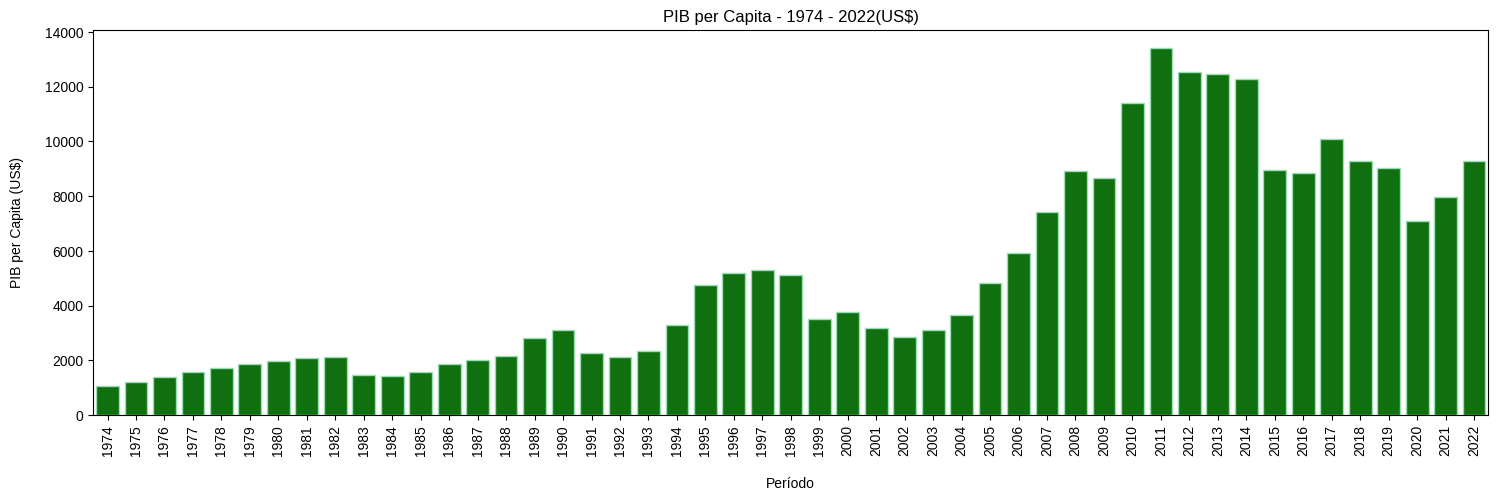

In [13]:
#Evolução do PIB per Capita: 1974 - 2022

#Tamanho da imagem
plt.figure(figsize=(18,5))

#Titulo
plt.title('PIB per Capita - 1974 - 2022(US$)')

#Estilo
plt.style.use('seaborn-v0_8-darkgrid')

#Gráfico de barras
sns.barplot(data=baseData2, x = 'Ano', y = 'PIB per Capita',color='green', edgecolor='#9adfb4')

#Labels
plt.xlabel('Período', labelpad=15)
plt.ylabel('PIB per Capita (US$)',labelpad=15)
plt.xticks(rotation=90);

In [14]:
#Evolução do PIB per Capita: 1974 - 2022 (Gráfico de Linhas)

#Criando uma figura
figure = Dash.Figure()

figure.add_trace(
    Dash.Scatter(
        x = baseData2['Ano'],
        y=baseData2['PIB per Capita'],
        mode = 'lines',
        marker_color = '#379217'

    )
)

#Ajustes no layout
figure.update_layout(
    #Titulo
    title = 'PIB per Capita - 1974 - 2022(US$)',

    #Tamanho
    titlefont_size=20,

    #xlabel
    xaxis = dict(
        title = 'Período',
        titlefont_size=14,
        tickmode = 'linear', #Define espaçamento linear
        dtick = 2, #Espaçamento de 2 anos

    ),

    #ylabel
    yaxis = dict(
        title = 'Pib per Capita em US$',
        titlefont_size=14,
        tickformat = ',d'

    )



)

In [15]:
baseData2.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Expectativa de Vida,População Masculina,População Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH
0,1974,1044.769809,8.153939,105089675,58.881,52448501,52641174,NaN,1044.769809,None,NaN,58.881
1,1975,1200.558237,5.166649,107619565,59.353,53701639,53917926,NaN,1200.558237,None,NaN,59.353
2,1976,1389.749523,10.257130,110213349,59.792,54988043,55225306,NaN,1389.749523,None,NaN,59.792
3,1977,1562.291430,4.934328,112875292,60.240,56309647,56565645,NaN,1562.291430,None,NaN,60.240
4,1978,1732.500122,4.969898,115600942,60.720,57663892,57937050,NaN,1732.500122,None,NaN,60.720


In [16]:
#Evolução do Crescimento Econômico: 1974 - 2022

#Criando uma Figura
figure = Dash.Figure()

figure.add_trace(
    Dash.Scatter(
        x = baseData2['Ano'],
        y = baseData2['Crescimento Econômico'],
        mode = 'lines',
        marker_color = '#f05a0f'

    )
)

#Ajustes no layout
figure.update_layout(
    #Titulo
    title = 'Crescimento Econômico: 1974-2022',
    titlefont_size=20,

    #Ajustando eixo x
    xaxis = dict(
        title = 'Período',
        titlefont_size=14,
        dtick =2
    ),
    #Ajustando eixo y
    yaxis = dict(
        title = 'Crescimento Econômico (%)',
        titlefont_size=14

    )
)


In [17]:
#Crescimento Populacional: 1974 - 2022

#Criando uma Figura
figure = Dash.Figure()

figure.add_trace(
    Dash.Scatter(
        x = baseData2['Ano'],
        y = baseData2['População'],
        mode = 'lines',
        marker_color = '#1303fc'

    )
)

#Ajustes no layout
figure.update_layout(
    #Titulo
    title = 'Crescimento Populacional: 1974-2022',
    titlefont_size=20,

    #Ajustando eixo x
    xaxis = dict(
        title = 'Período',
        titlefont_size=14,
        dtick =2
    ),
    #Ajustando eixo y
    yaxis = dict(
        title = 'Crescimento Populacional',
        titlefont_size=14

    )
)

In [18]:
baseData2.head()

,Ano,PIB per Capita,Crescimento Econômico,População,Expectativa de Vida,População Masculina,População Feminina,Baixa Renda,Renda Média Baixa,Renda Média Alta,Alta Renda,IDH
0,1974,1044.769809,8.153939,105089675,58.881,52448501,52641174,NaN,1044.769809,None,NaN,58.881
1,1975,1200.558237,5.166649,107619565,59.353,53701639,53917926,NaN,1200.558237,None,NaN,59.353
2,1976,1389.749523,10.257130,110213349,59.792,54988043,55225306,NaN,1389.749523,None,NaN,59.792
3,1977,1562.291430,4.934328,112875292,60.240,56309647,56565645,NaN,1562.291430,None,NaN,60.240
4,1978,1732.500122,4.969898,115600942,60.720,57663892,57937050,NaN,1732.500122,None,NaN,60.720


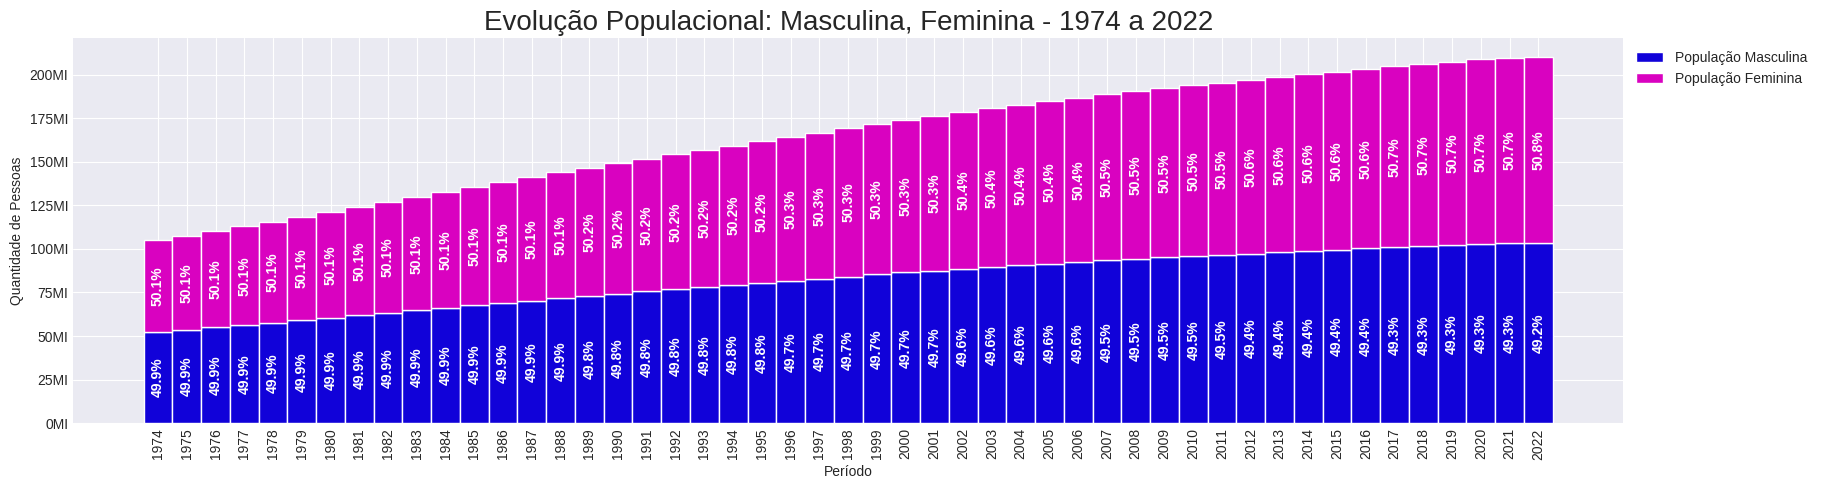

In [19]:
import matplotlib.ticker as mtick

#Gráfico de evolução Pop. Masculina x Feminina

#Tamanho
plt.figure(figsize=(20,5))

#Plot pop masc
plt.bar( baseData2['Ano'],baseData2['População Masculina'],color='#1102d9',edgecolor='white', width=1)

#Plot pop fem
plt.bar(baseData2['Ano'],baseData2['População Feminina'],bottom = baseData2['População Masculina'], color='#d902c0',edgecolor='white',width=1)

#Titulo
plt.title('Evolução Populacional: Masculina, Feminina - 1974 a 2022', loc='center',fontsize=20)

#Labels
plt.xlabel('Período')
plt.xticks(rotation=90)
plt.ylabel('Quantidade de Pessoas')

#Formatar valores do label Y para milhões
def milhoes(x,pos):
  return f'{x/1e6:.0f}MI'

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(milhoes))

#Calculo da porcentagem
totalPop = baseData2['População Masculina'] + baseData2['População Feminina']
pctMasc = (baseData2['População Masculina'] / totalPop) * 100
pctFem = (baseData2['População Feminina'] / totalPop) * 100

#Adicionar porcentagem dentro das barras
for i, ano in enumerate(baseData2['Ano']):
  plt.text(ano,baseData2['População Masculina'][i]/2, f'{pctMasc[i]:.1f}%', ha='center',va='center',color='white', fontsize = 10, weight='bold',rotation=90)
  plt.text(ano,baseData2['População Masculina'][i] + baseData2['População Feminina'][i]/2, f'{pctFem[i]:.1f}%', ha='center',va='center',color='white', fontsize = 10,weight='bold',rotation=90)


#Legenda
plt.legend(['População Masculina','População Feminina'], bbox_to_anchor=(1,1))

In [20]:
#Paleta de cores para o gráfico de dispersão

paletaCores = sns.color_palette('husl',20)
paletaCores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]

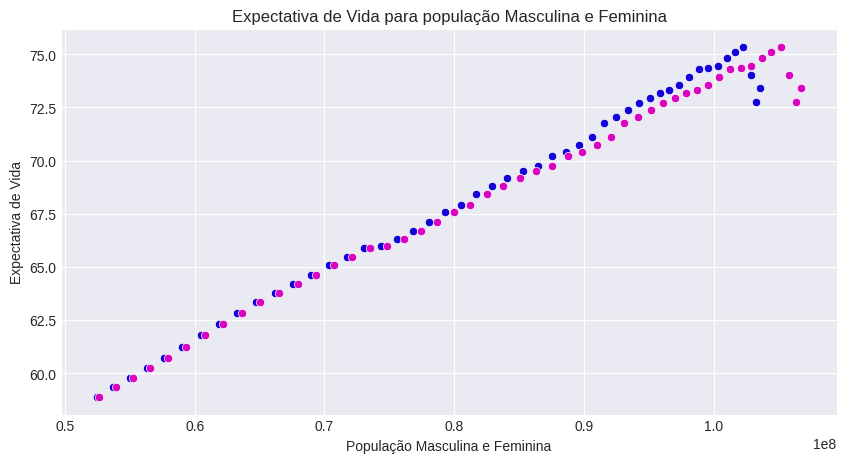

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=baseData2, x='População Masculina', y='Expectativa de Vida',color='#1102d9', )
sns.scatterplot(data=baseData2, x='População Feminina', y='Expectativa de Vida',color='#d902c0')

#Adicionando Titulo
plt.title('Expectativa de Vida para população Masculina e Feminina')
plt.xlabel('População Masculina e Feminina')

plt.show()

<Axes: >

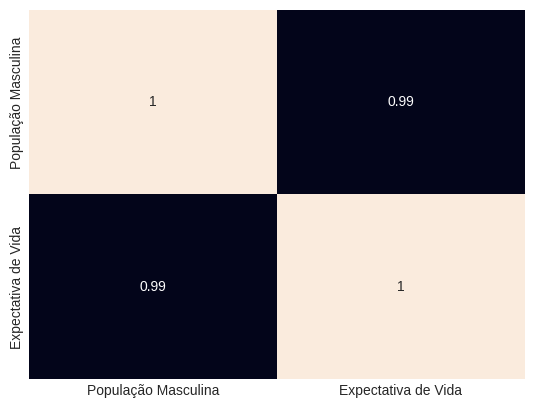

In [22]:
corrData = baseData2[['População Masculina','Expectativa de Vida']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

<Axes: >

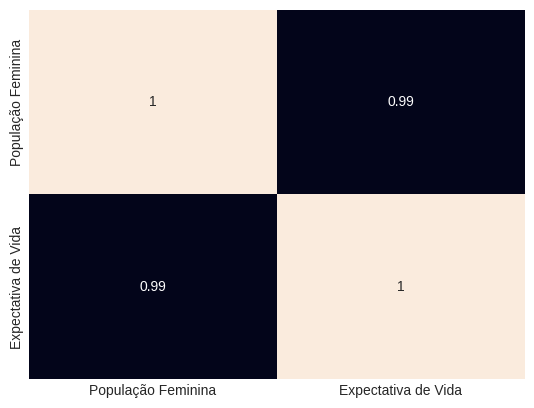

In [23]:
corrData = baseData2[['População Feminina','Expectativa de Vida']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

<Axes: >

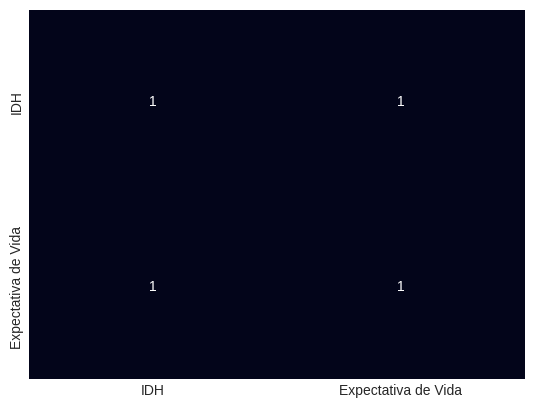

In [24]:
corrData = baseData2[['IDH','Expectativa de Vida']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

<Axes: xlabel='Expectativa de Vida', ylabel='IDH'>

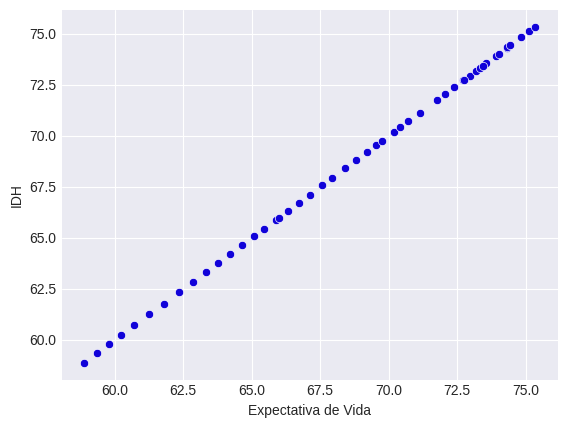

In [28]:
sns.scatterplot(data=baseData2, x='Expectativa de Vida', y='IDH',color='#1102d9', )

<Axes: >

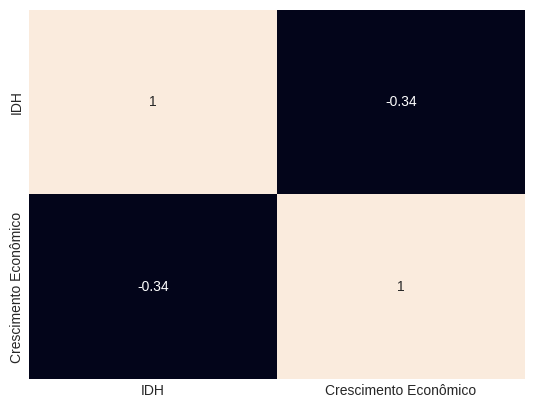

In [25]:
corrData = baseData2[['IDH','Crescimento Econômico']].corr()

sns.heatmap(corrData,cbar=False,annot=True)

<Axes: xlabel='IDH', ylabel='Crescimento Econômico'>

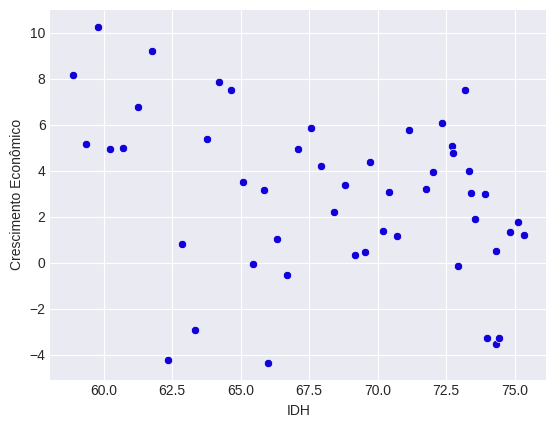

In [26]:
sns.scatterplot(data=baseData2, x='IDH', y='Crescimento Econômico',color='#1102d9', )
